# 逻辑回归算法：是一个分类算法！
![](./images/logiregress.png)

In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# ...
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

# Sigmoid 函数

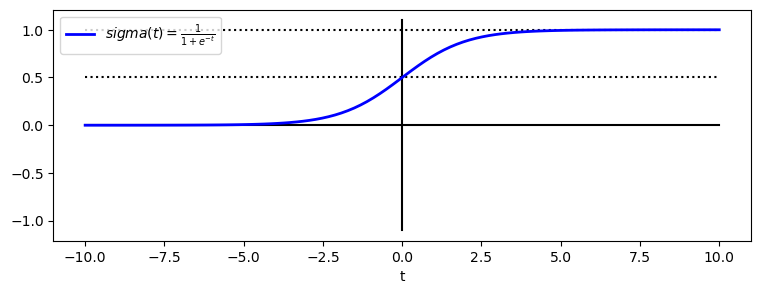

In [4]:
# 在[-10, 10]区间产生100个点
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], 'k-')
plt.plot([-10, 10], [0.5, 0.5], 'k:')
plt.plot([-10, 10], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, 'b-', linewidth=2, label=r'$sigma(t) = \frac{1}{1+e^{-t}}$')
plt.xlabel('t')
plt.legend(loc='upper left')
plt.show()

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.DESCR
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [11]:
X = iris['data'][:,3:] # 花瓣宽度
y = (iris['target'] == 2).astype(np.int) # 将标签处理为二分类，即类别2设置为1，其它设置为0

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X, y)

LogisticRegression()

In [17]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
# log_res.predict(X_new) # predict 会以 0.5 直接做结果判断
y_prob = log_res.predict_proba(X_new)
y_prob

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

(0.0, 3.0, -0.02, 1.02)

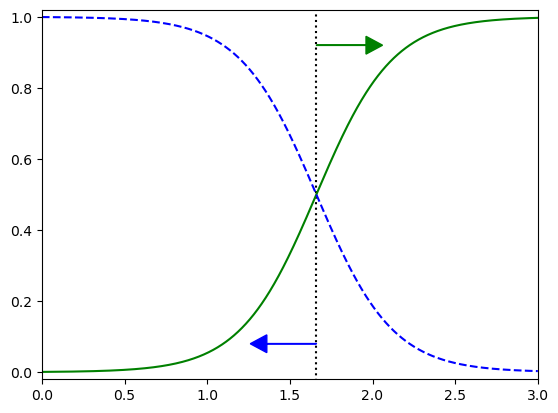

In [24]:
decision_boundary = X_new[y_prob[:,1]>=0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1, 2], 'k:')
plt.plot(X_new, y_prob[:, 1], 'g-', label='type 2')
plt.plot(X_new, y_prob[:, 0], 'b--', label='not type 2')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.axis([0, 3, -0.02, 1.02])

In [21]:
print(help(plt.arrow))

Help on function arrow in module matplotlib.pyplot:

arrow(x, y, dx, dy, **kwargs)
    Add an arrow to the Axes.
    
    This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``.
    
    Parameters
    ----------
    x, y : float
        The x and y coordinates of the arrow base.
    
    dx, dy : float
        The length of the arrow along x and y direction.
    
    width : float, default: 0.001
        Width of full arrow tail.
    
    length_includes_head : bool, default: False
        True if head is to be counted in calculating the length.
    
    head_width : float or None, default: 3*width
        Total width of the full arrow head.
    
    head_length : float or None, default: 1.5*head_width
        Length of arrow head.
    
    shape : {'full', 'left', 'right'}, default: 'full'
        Draw the left-half, right-half, or full arrow.
    
    overhang : float, default: 0
        Fraction that the arrow is swept back (0 overhang means
        triangular shape). Can be negat

回执决策边界

In [29]:
X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
X = iris['data'][:, (2, 3)]
y = (iris['target']==2).astype(np.int)
log_res = LogisticRegression()
log_res.fit(X, y)
# 构建坐标数据
np.meshgrid(np.linspace())